
# Assignment 2  <font color="blue"> (15 points) </font>

***

### General Instructions
  + You may need additional libraries besides the Python standard library to solve some questions. Import only necessary libraries.
  + If more than one library exist for a same purpose, choose the one you wish as long as it does the task properly.
  + If we want you to use a specific library, then we will state it clearly.
  + Use the exact variable names asked in the questions. When no clear instructions given, feel free to do it the way you would like to.
  + After each question, add the needed number of new cells and place your answers inside the cells.
  + Use text cells for explanations. Use explanation and plain text as much as possible.
  + Do not remove or modify the original cells provided by the instructor.
  + In the following cell you will find some extra options to make your code more readable, including output colors RED, OKBLUE, or output text styles like BOLD or UNDERLINE that. Do not hesitate to use them. As an example, one may output text in red as follows:
  ```python
     print(bcolors.RED + "your text" + bcolors.ENDC)
  ```
  + Comment your code whenever needed using # sign at the beginning of the row.
  + In some questions some of the details needed for solving the problem are **purposely** omitted to encourage additional self-directed research. This, especially, helps you develop some search skills for coding in Python (which is inevitable due to the inconsistent syntax of Python).
  + Do not hesitate to communicate your questions to the TA's or instructors.
    
  Good luck!

In [1]:

# The following piece of code gives the opportunity to show multiple outputs
# in one cell:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"


# Colorful outputs
class bcolors:
    RED       = '\033[91m'
    OKBLUE    = '\033[94m'
    BOLD      = '\033[1m'
    UNDERLINE = '\033[4m'
    ENDC      = '\033[0m'

## **Part A** <font color="blue">(7 points)</font>

1. **<font color=blue> (1 point) </font>** Download `Credit.csv` from <http://www.statlearning.com/resources-first-edition> and upload it into this notebook. Print the first $5$ rows of the data. Using appropriate descriptive statistics or visualization methods describe the variables and possible association amongst them. Interpret the results.
2. **<font color=blue> (0.5 points)</font>** Keep only `Income`, `Limit`, `Rating`, `Cards`, `Age`, `Education`, and `Balance` as your variables and throw the rest of variables away. Print the dimension of this new dataset.
3.  **<font color=blue> (0.5 points) </font>** Create a binary variable `Balance_1500` which equals $1$ for the observations with `Balance` $> 1500$, and equals $0$ otherwise.
4. **<font color=blue> (3 points) </font>** Model `Balance_1500` by the explanatory variables `Income`, `Limit`, `Rating`, `Cards`, `Age`, `Education` using the following models:
    + logistic regression,
    + linear discriminant, and
    + quadratic discriminant.
8. **<font color=blue> (0.5 points) </font>** Find the probability of (`Balance` $> 1500$), for the following values, using all three aforementionned methods:

|    Income    |    Limit     |     Rating     |    Cards     |      Age        |   Education   |
|--------------|--------------|----------------|--------------|-----------------|---------------|
|      63      |    8100      |     600        |      4       |       30        |      13       |
|     186      |    13414     |     950        |      2       |       41        |      13       |

</br>
Compare the probabilities and comment.
    
9. **<font color=blue> (1.5 points) </font>** For each method, print the confusion matrix, the accuracy score and the AUC using all observations. Compare these metrics and comment.

## Answer to **Part A** <font color="blue"></font>

#### **A.1.1. Import Needed Libraries**

In [2]:
# Import Pandas
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#from sklearn.preprocessing import scale

#### **A.1.2. Load Data and Print the first  5  rows of the data**

In [3]:
credit_original_df = pd.read_csv(filepath_or_buffer=r'Credit.csv')

# create a copy of the original dataframe - needed later
credit_df = credit_original_df.copy(deep=True)

# Use .head() to Print the first 5 rows of the data.
credit_df.head()

,Income,Limit,Rating,Cards,Age,Education,Own,Student,Married,Region,Balance
0,14.891,3606,283,2,34,11,No,No,Yes,South,333
1,106.025,6645,483,3,82,15,Yes,Yes,Yes,West,903
2,104.593,7075,514,4,71,11,No,No,No,West,580
3,148.924,9504,681,3,36,11,Yes,No,No,West,964
4,55.882,4897,357,2,68,16,No,No,Yes,South,331


#### **A.1.3. Using appropriate descriptive statistics or visualization methods describe the variables and possible association amongst them**

In [4]:
credit_df.describe()

,Income,Limit,Rating,Cards,Age,Education,Balance
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,45.218885,4735.600000,354.940000,2.957500,55.667500,13.450000,520.015000
std,35.244273,2308.198848,154.724143,1.371275,17.249807,3.125207,459.758877
min,10.354000,855.000000,93.000000,1.000000,23.000000,5.000000,0.000000
25%,21.007250,3088.000000,247.250000,2.000000,41.750000,11.000000,68.750000
50%,33.115500,4622.500000,344.000000,3.000000,56.000000,14.000000,459.500000
75%,57.470750,5872.750000,437.250000,4.000000,70.000000,16.000000,863.000000
max,186.634000,13913.000000,982.000000,9.000000,98.000000,20.000000,1999.000000


In [5]:
credit_df.shape

(400, 11)

In [6]:
credit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Income     400 non-null    float64
 1   Limit      400 non-null    int64  
 2   Rating     400 non-null    int64  
 3   Cards      400 non-null    int64  
 4   Age        400 non-null    int64  
 5   Education  400 non-null    int64  
 6   Own        400 non-null    object 
 7   Student    400 non-null    object 
 8   Married    400 non-null    object 
 9   Region     400 non-null    object 
 10  Balance    400 non-null    int64  
dtypes: float64(1), int64(6), object(4)
memory usage: 34.5+ KB


In [7]:
# from credit_df.info(), there are no missing(Non-Null) values
# confirm there are no missing values by running isnull() for all columns and check if/number of records with NaN values
credit_df_na = credit_df[credit_df.isnull().any(axis=1)]
credit_df_na.shape[0]

0

In [8]:
# for each column, display column name & its distinct contents ONLY in case the column has less than 6 unique values

str_=""
for column in credit_df:
    columnSeriesObj = credit_df[column]
    str_ = 'Column Name: ' + column + ', Column Type: ' + str(credit_df[column].dtype)
    if len(columnSeriesObj.unique()) <= 5:
      str_ = str_ + ', Column Contents : '
      for val in columnSeriesObj.unique():
        str_ = str_  + str(val) + ","
      str_ = str_[:len(str_)-1]
    print(str_)

Column Name: Income, Column Type: float64
Column Name: Limit, Column Type: int64
Column Name: Rating, Column Type: int64
Column Name: Cards, Column Type: int64
Column Name: Age, Column Type: int64
Column Name: Education, Column Type: int64
Column Name: Own, Column Type: object, Column Contents : No,Yes
Column Name: Student, Column Type: object, Column Contents : No,Yes
Column Name: Married, Column Type: object, Column Contents : Yes,No
Column Name: Region, Column Type: object, Column Contents : South,West,East
Column Name: Balance, Column Type: int64


In [9]:
# Detect missing values
credit_df.isnull().values.any()

False

#### **A.1.4. Describing the variables in credit_df dataframe:**


1.  *credit_df* has 11 columns: [Income,Limit,Rating,Cards,Age,Education,Own,Student,Married,Region,Balance]
2.  The data type for four columns are of type *Object*  - details:

*   Three columns *Own, Student, and Married*  each one has only two distinct values: Yes & No.
*   One column *Region* with three distinct values: South,West,East.

For above columns, we can use *df[col]*.factorize() to encode as an enumerated type or categorical variable


3.  There is no values as *NaN* in any of the columns








In [10]:
# create a copy of the original dataframe
# credit_df2 is a temp data set not used in next step
credit_df2 = credit_df.copy(deep=True)

credit_df2["Own_Factor"] = credit_df2["Own"].factorize()[0]
credit_df2["Student_Factor"] = credit_df2["Student"].factorize()[0]
credit_df2["Married_Factor"] = credit_df2["Married"].factorize()[0]
credit_df2["Region_Factor"] = credit_df2["Region"].factorize()[0]

credit_df2.head()

,Income,Limit,Rating,Cards,Age,Education,Own,Student,Married,Region,Balance,Own_Factor,Student_Factor,Married_Factor,Region_Factor
0,14.891,3606,283,2,34,11,No,No,Yes,South,333,0,0,0,0
1,106.025,6645,483,3,82,15,Yes,Yes,Yes,West,903,1,1,0,1
2,104.593,7075,514,4,71,11,No,No,No,West,580,0,0,1,1
3,148.924,9504,681,3,36,11,Yes,No,No,West,964,1,0,1,1
4,55.882,4897,357,2,68,16,No,No,Yes,South,331,0,0,0,0


In [11]:
credit_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Income          400 non-null    float64
 1   Limit           400 non-null    int64  
 2   Rating          400 non-null    int64  
 3   Cards           400 non-null    int64  
 4   Age             400 non-null    int64  
 5   Education       400 non-null    int64  
 6   Own             400 non-null    object 
 7   Student         400 non-null    object 
 8   Married         400 non-null    object 
 9   Region          400 non-null    object 
 10  Balance         400 non-null    int64  
 11  Own_Factor      400 non-null    int64  
 12  Student_Factor  400 non-null    int64  
 13  Married_Factor  400 non-null    int64  
 14  Region_Factor   400 non-null    int64  
dtypes: float64(1), int64(10), object(4)
memory usage: 47.0+ KB


#### **A.1.5_1. Using appropriate descriptive statistics or visualization methods describe the variables and possible association amongst them. Interpret the results**

(<Figure size 1000x1000 with 1 Axes>, <Axes: >)

<Axes: >

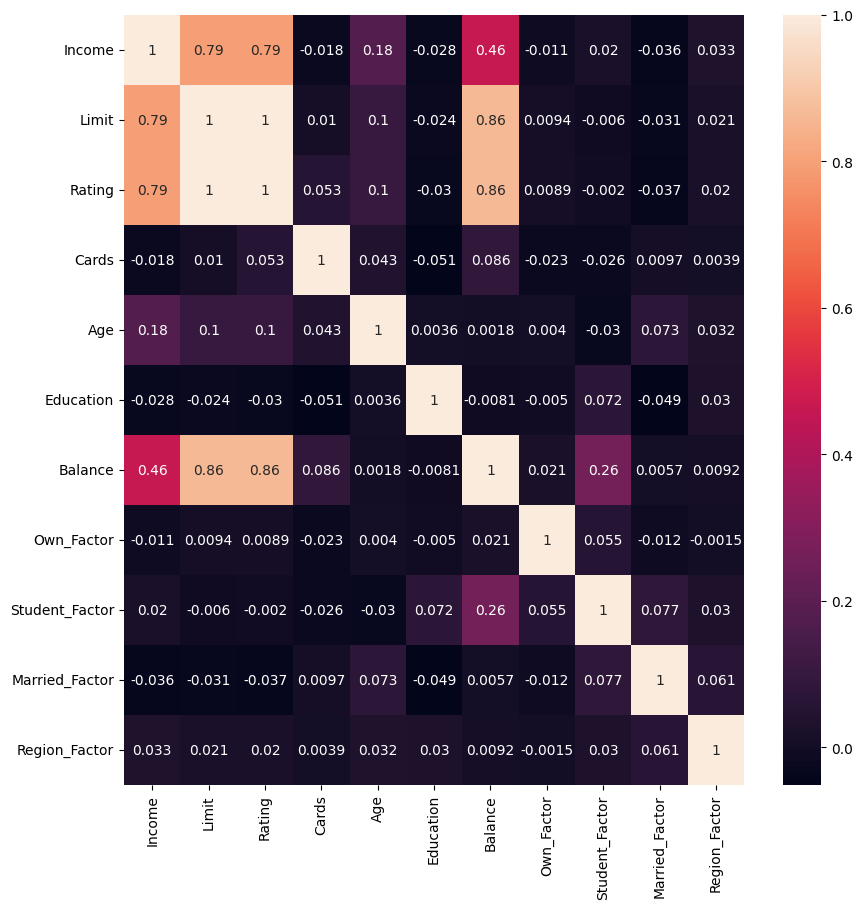

In [12]:
# Please note the below is done here is for the sake of exploring possible association amongst the featurs for the whole dataset
# (after encoding the 4 object columns as per above step and then dropping the 4 columns of type object

# That is performed again with an updated dataset as requested in A.2.

# drop columns of type object
credit_df2 = credit_df2.drop(columns=['Own','Student','Married','Region'])

col_corr2 = credit_df2.corr()

# check Correlation with heatmaps
plt.subplots(figsize=(10,10))
sns.heatmap(col_corr2, xticklabels=col_corr2.columns,yticklabels=col_corr2.columns,annot=True)

2. **<font color=blue> (0.5 points)</font>** Keep only `Income`, `Limit`, `Rating`, `Cards`, `Age`, `Education`, and `Balance` as your variables and throw the rest of variables away. Print the dimension of this new dataset.

**#### A.2.1.Keep only Income, Limit, Rating, Cards, Age, Education, and Balance as your variables and throw the rest of variables away.**

In [13]:
credit_df = credit_df.drop(columns=['Own','Student','Married','Region'])

#### A.2.2.Print the dimension of this new dataset

In [14]:
# using The shape property to get the dimension of credit_df dataframe
credit_df.shape

(400, 7)

#### A.1.5_2. ***(repeated for the data frame with required features/columns ONLY)*** Using appropriate descriptive statistics & visualization methods describe the variables and possible association amongst them (for *credit_df* with ONLY the 7 columns [*Income, Limit, Rating, Cards, Age, Education, and Balance*] as requested in #2).

(<Figure size 1000x1000 with 1 Axes>, <Axes: >)

<Axes: >

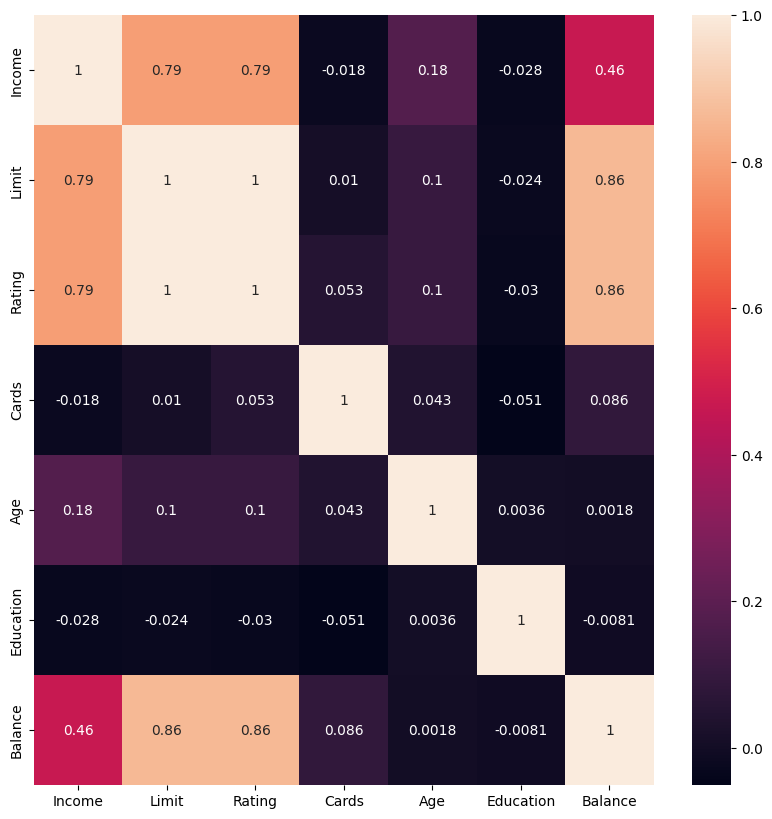

In [15]:
col_corr = credit_df.corr()

plt.subplots(figsize=(10,10))
sns.heatmap(col_corr, xticklabels=col_corr.columns,yticklabels=col_corr.columns,annot=True)

##### From on the above heatmap chart, we observe that:  
**Strong Correlation:**
*   Limit and Rating (=1)
*   Balance and Limit
*   Balance and Rating
*   Income and Limit
*   Income and Rating

**Moderate Correlations:**
* Balance and Income



Other Correlations are of **Weak Correlation** as it is close to zero

**#### A.3.1. Create a binary variable Balance_1500 which equals  1  for the observations with Balance  >1500 , and equals  0  otherwise.**

In [16]:
credit_df["Balance_1500"] = (credit_df["Balance"]>1500).factorize() [0]
#credit_df[credit_df["Balance_1500"]].unique()
credit_df["Balance_1500"].unique()

array([0, 1])

In [17]:
credit_df[credit_df["Balance_1500"]==1]

,Income,Limit,Rating,Cards,Age,Education,Balance,Balance_1500
28,186.634,13414,949,2,41,14,1809,1
85,152.298,12066,828,4,41,12,1779,1
102,68.713,7582,531,2,56,16,1587,1
139,107.841,10384,728,3,87,7,1597,1
174,121.834,10673,750,3,54,16,1573,1
191,124.290,9560,701,3,52,17,1687,1
222,33.437,6207,451,4,44,9,1549,1
293,140.672,11200,817,7,46,9,1677,1
323,182.728,13913,982,4,98,17,1999,1


In [18]:
credit_df[credit_df["Balance_1500"]==0]

,Income,Limit,Rating,Cards,Age,Education,Balance,Balance_1500
0,14.891,3606,283,2,34,11,333,0
1,106.025,6645,483,3,82,15,903,0
2,104.593,7075,514,4,71,11,580,0
3,148.924,9504,681,3,36,11,964,0
4,55.882,4897,357,2,68,16,331,0
...,...,...,...,...,...,...,...,...
395,12.096,4100,307,3,32,13,560,0
396,13.364,3838,296,5,65,17,480,0
397,57.872,4171,321,5,67,12,138,0
398,37.728,2525,192,1,44,13,0,0


In [19]:
credit_df.head()

,Income,Limit,Rating,Cards,Age,Education,Balance,Balance_1500
0,14.891,3606,283,2,34,11,333,0
1,106.025,6645,483,3,82,15,903,0
2,104.593,7075,514,4,71,11,580,0
3,148.924,9504,681,3,36,11,964,0
4,55.882,4897,357,2,68,16,331,0


#### A.4.1. Model Balance_1500 by the explanatory variables Income, Limit, Rating, Cards, Age, Education using ***logistic regression***, ***linear discriminant***, and ***quadratic discriminant***

In [20]:
# prepare X (input/features),y(output/to be predicted), and X_pred labels to be used for prediction of probability as requested
X = credit_df[['Income','Limit','Rating','Cards','Age','Education']]
y = credit_df['Balance_1500']

X_pred=[[63,8100,600,4,30,13],[186,13414,950,2,41,13]]

print("X.shape: ", X.shape)
print("y.shape: ", y.shape)
print("X_pred.shape: ", np.array(X_pred).shape)

X.shape:  (400, 6)
y.shape:  (400,)
X_pred.shape:  (2, 6)


In [21]:
# 1- using logistic regression,
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression() #solver = 'liblinear', multi_class="auto"

logreg.fit(X, y)

print("logreg.intercept_ :", logreg.intercept_)
print("logreg.coef_ :",logreg.coef_)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

logreg.intercept_ : [-0.47986794]
logreg.coef_ : [[-0.00226872  0.00489371 -0.05896355  0.28953066 -0.06980691 -0.37412095]]


In [22]:
# 2- using linear discriminant,
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

LnrDscAnl = LinearDiscriminantAnalysis()

LnrDscAnl.fit(X, y)

print("LnrDscAnl.intercept_ :", LnrDscAnl.intercept_)
print("LnrDscAnl.coef_ :",LnrDscAnl.coef_)

LinearDiscriminantAnalysis()

LnrDscAnl.intercept_ : [-14.25754044]
LnrDscAnl.coef_ : [[ 2.50503328e-02 -2.46350024e-04  1.90771457e-02  2.92958512e-01
  -1.61624107e-02 -1.68504978e-02]]


#### A.4.3. Model Balance_1500 by the explanatory variables Income, Limit, Rating, Cards, Age, Education using ***quadratic discriminant***

In [23]:
# 3- using quadratic discriminant
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

QdrDscAnl = QuadraticDiscriminantAnalysis()

QdrDscAnl.fit(X, y)

QuadraticDiscriminantAnalysis()

#### A.5.1. Find the probability of (Balance  >1500 ), for the following values, using ***logistic regression***
|    Income    |    Limit     |     Rating     |    Cards     |      Age        |   Education   |
|--------------|--------------|----------------|--------------|-----------------|---------------|
|      63      |    8100      |     600        |      4       |       30        |      13       |
|     186      |    13414     |     950        |      2       |       41        |      13       |

In [24]:
# using logistic regression
y_pred_probs_logreg = logreg.predict_proba(X_pred)

print(y_pred_probs_logreg.shape) # expected 2 by 2 array as it has prediction of probability =0 and =1 for each of
# the two  given list of values
print(y_pred_probs_logreg)
print(y_pred_probs_logreg[:, 1])

(2, 2)
[[0.89674322 0.10325678]
 [0.17074154 0.82925846]]
[0.10325678 0.82925846]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [25]:
print("Probability of (Balance >1500 ), for the given values, using logistic regression are as following:")
print(y_pred_probs_logreg[0, 1], "for the first list of values and",y_pred_probs_logreg[1, 1],"for the second list of values")

Probability of (Balance >1500 ), for the given values, using logistic regression are as following:
0.10325678157065321 for the first list of values and 0.8292584564672354 for the second list of values


#### A.5.2. Find the probability of (Balance  >1500 ), for the following values, using ***linear discriminant***
|    Income    |    Limit     |     Rating     |    Cards     |      Age        |   Education   |
|--------------|--------------|----------------|--------------|-----------------|---------------|
|      63      |    8100      |     600        |      4       |       30        |      13       |
|     186      |    13414     |     950        |      2       |       41        |      13       |

In [26]:
#X_pred=[[63,8100,600,4,30,13],[186,13414,950,2,41,13]]

y_pred_probs_LnrDscAnl = LnrDscAnl.predict_proba(X_pred)

print(y_pred_probs_LnrDscAnl.shape) # expected 2 by 2 array as it has prediction of probability =0 and =1 for both list of values given
print(y_pred_probs_LnrDscAnl)
print(y_pred_probs_LnrDscAnl[:, 1])

print("Probability of (Balance >1500 ), for the given values, using logistic regression are as following:")
print(y_pred_probs_LnrDscAnl[0, 1], "for the first list of values and",y_pred_probs_LnrDscAnl[1, 1],"for the second list of values")

(2, 2)
[[0.94050988 0.05949012]
 [0.00721199 0.99278801]]
[0.05949012 0.99278801]
Probability of (Balance >1500 ), for the given values, using logistic regression are as following:
0.05949011519242823 for the first list of values and 0.9927880109254117 for the second list of values


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearDiscriminantAnalysis was fitted with feature names
  warnings.warn(


#### A.5.3. Find the probability of (Balance  >1500 ), for the following values, using ***quadratic discriminant***
|    Income    |    Limit     |     Rating     |    Cards     |      Age        |   Education   |
|--------------|--------------|----------------|--------------|-----------------|---------------|
|      63      |    8100      |     600        |      4       |       30        |      13       |
|     186      |    13414     |     950        |      2       |       41        |      13       |

In [27]:
#X_pred=[[63,8100,600,4,30,13],[186,13414,950,2,41,13]]

y_pred_probs_QdrDscAnl = QdrDscAnl.predict_proba(X_pred)

print(y_pred_probs_QdrDscAnl.shape) # expected 2 by 2 array as it has prediction of probability =0 and =1 for both list of values given
print(y_pred_probs_QdrDscAnl)
print(y_pred_probs_QdrDscAnl[:, 1])

print("Probability of (Balance >1500 ), for the given values, using logistic regression are as following:")
print(y_pred_probs_QdrDscAnl[0, 1], "for the first list of values and",y_pred_probs_QdrDscAnl[1, 1],"for the second list of values")

(2, 2)
[[9.99999995e-01 4.93626009e-09]
 [7.83057752e-04 9.99216942e-01]]
[4.93626009e-09 9.99216942e-01]
Probability of (Balance >1500 ), for the given values, using logistic regression are as following:
4.9362600942105824e-09 for the first list of values and 0.9992169422475801 for the second list of values


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but QuadraticDiscriminantAnalysis was fitted with feature names
  warnings.warn(


In [28]:
print('* Probability of (Balance > 1500 ) for the [Income,Limit,Rating,Cards,Age,Education]=',X_pred[0])
print("1- In case of logistic regression is ",y_pred_probs_logreg[0, 1])
print("2- In case of linear discriminant is ",y_pred_probs_LnrDscAnl[0, 1])
print("3- In case of quadratic discriminant is ",y_pred_probs_QdrDscAnl[0, 1])
print("***********************************************************************************************************")
print('* Probability of (Balance > 1500 ) for the [Income,Limit,Rating,Cards,Age,Education]=',X_pred[1])
print("1- In case of logistic regression is ",y_pred_probs_logreg[1, 1])
print("2- In case of linear discriminant is ",y_pred_probs_LnrDscAnl[1, 1])
print("3- In case of quadratic discriminant is ",y_pred_probs_QdrDscAnl[1, 1])

* Probability of (Balance > 1500 ) for the [Income,Limit,Rating,Cards,Age,Education]= [63, 8100, 600, 4, 30, 13]
1- In case of logistic regression is  0.10325678157065321
2- In case of linear discriminant is  0.05949011519242823
3- In case of quadratic discriminant is  4.9362600942105824e-09
***********************************************************************************************************
* Probability of (Balance > 1500 ) for the [Income,Limit,Rating,Cards,Age,Education]= [186, 13414, 950, 2, 41, 13]
1- In case of logistic regression is  0.8292584564672354
2- In case of linear discriminant is  0.9927880109254117
3- In case of quadratic discriminant is  0.9992169422475801


#### A.5.4. Compare the probabilities and comment.

1- Using the three models low value for the probability is predicted for the first set of values of [Income,Limit,Rating,Cards,Age,Education] = [63, 8100, 600, 4, 30, 13].

2- Using the three models high value for the probability is predicted for the first set of values of [Income,Limit,Rating,Cards,Age,Education] = [186,13414,950,2,41,13].

3- This agrees with the strong correlation between "Balance and Limit" and between "Balance and Rating" - as higher balance and rating are in the 2nd set of values so it is expected to have the higher probability prediction for the models with higher balance

4- **For the first set of values [63, 8100, 600, 4, 30, 13]** : Prediction of the Probability given by  the ***quadratic discriminant*** model  is very low (the lowest) compared to the other two models. ***logistic regression*** model gives (the highest probability) compared to the other two models.

5- **For the second set of values [186, 13414, 950, 2, 41, 13]** : Prediction of the Probability given by  the ***quadratic discriminant*** model is (the highest) compared to the other two models and it is slighly higher than the prediction given by the **linear discriminant** model. ***logistic regression*** model gives the (the lowest probability) compared to the other two models.

=> Also above results agrees with below screenshots from the data in ***Credit.csv***  [Data for features/columns that have strong positive relationship are highlighted in green]
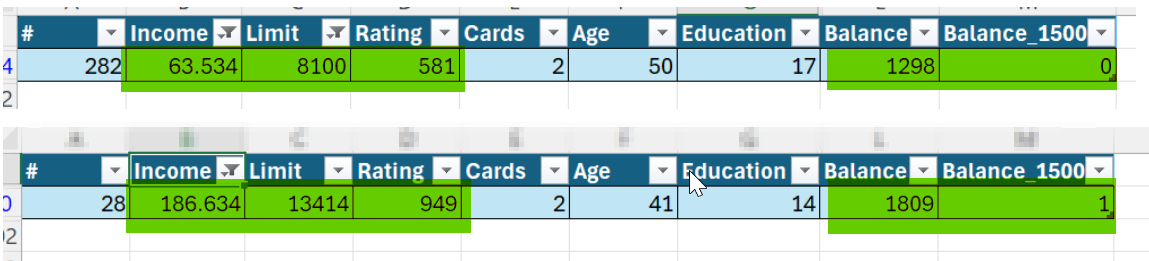

#### A.6.1. For ***logistic regression***, print the confusion matrix, the accuracy score and the AUC using all observations.

In [29]:
#from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score

print("*** For logistic regression ***")

y_pred_log = logreg.predict(X)
conf_matrix_logreg = confusion_matrix(y, y_pred_log)
print("* conf_matrix_logreg: ")
print(conf_matrix_logreg)

print("\n* accuracy_score_logreg: ")
print(np.trace(conf_matrix_logreg)/np.sum(conf_matrix_logreg))

classification_report_logreg = classification_report(y, y_pred_log)
print("\n* classification_report_logreg: ")
print(classification_report_logreg)

print("\n* roc_auc_score :")
y_pred_proba_all_log = logreg.predict_proba(X)[:,1]
print(roc_auc_score(y, y_pred_proba_all_log))

*** For logistic regression ***
* conf_matrix_logreg: 
[[390   1]
 [  6   3]]

* accuracy_score_logreg: 
0.9825

* classification_report_logreg: 
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       391
           1       0.75      0.33      0.46         9

    accuracy                           0.98       400
   macro avg       0.87      0.67      0.73       400
weighted avg       0.98      0.98      0.98       400


* roc_auc_score :
0.9369138959931799


#### A.6.2. For ***linear discriminant***, print the confusion matrix, the accuracy score and the AUC using all observations.

In [30]:
print("*** For linear discriminant ***")

y_pred_lnrdsc = LnrDscAnl.predict(X)
conf_matrix_lnrdsc = confusion_matrix(y, y_pred_lnrdsc)
print("* conf_matrix_lnrdsc: ")
print(conf_matrix_lnrdsc)

print("\n * accuracy_score_lnrdsc: ")
print(np.trace(conf_matrix_lnrdsc)/np.sum(conf_matrix_lnrdsc))

classification_report_lnrdsc = classification_report(y, y_pred_lnrdsc)
print("\n * classification_report_lnrdsc: ")
print(classification_report_lnrdsc)

print("\n* roc_auc_score :")
y_pred_proba_all_lnrDsc = LnrDscAnl.predict_proba(X)[:,1]
print(roc_auc_score(y, y_pred_proba_all_lnrDsc))

*** For linear discriminant ***
* conf_matrix_lnrdsc: 
[[383   8]
 [  4   5]]

 * accuracy_score_lnrdsc: 
0.97

 * classification_report_lnrdsc: 
              precision    recall  f1-score   support

           0       0.99      0.98      0.98       391
           1       0.38      0.56      0.45         9

    accuracy                           0.97       400
   macro avg       0.69      0.77      0.72       400
weighted avg       0.98      0.97      0.97       400


* roc_auc_score :
0.9516908212560387


#### A.6.3. For ***quadratic discriminant***, print the confusion matrix, the accuracy score and the AUC using all observations.

In [31]:
print("*** For quadratic discriminant ***")

y_pred_qdrdsc = QdrDscAnl.predict(X)
conf_matrix_qdrdsc = confusion_matrix(y, y_pred_qdrdsc)
print("* conf_matrix_qdrdsc: ")
print(conf_matrix_qdrdsc)

print("\n *accuracy_score_qdrdsc: ")
print(np.trace(conf_matrix_qdrdsc)/np.sum(conf_matrix_qdrdsc))

classification_report_qdrdsc = classification_report(y, y_pred_qdrdsc)
print("\n *classification_report_qdrdsc: ")
print(classification_report_qdrdsc)

print("\n* roc_auc_score :")
y_pred_proba_all_qdrdsc = QdrDscAnl.predict_proba(X)[:,1]
print(roc_auc_score(y, y_pred_proba_all_qdrdsc))

*** For quadratic discriminant ***
* conf_matrix_qdrdsc: 
[[390   1]
 [  2   7]]

 *accuracy_score_qdrdsc: 
0.9925

 *classification_report_qdrdsc: 
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       391
           1       0.88      0.78      0.82         9

    accuracy                           0.99       400
   macro avg       0.93      0.89      0.91       400
weighted avg       0.99      0.99      0.99       400


* roc_auc_score :
0.9948849104859335


#### A.6.4. Compare these metrics and comment.

1- Above values for the confusion matrix and accuracy score in the above results show that  The ***quadratic discriminant model*** has highest accuarcy=0.9925 and best f1-score=1.00 for class 0 (Balance <= 1500) and best f1-score=0.82 for class 1 (Balance > 1500).


2- Also, ***quadratic discriminant model*** has the highest AUC (0.995), which indicates that it is the best model at correctly classifying observations into categories (Balance <= 1500) and (Balance > 1500).

==============================================================================================================

==============================================================================================================

==============================================================================================================

==============================================================================================================

==============================================================================================================

## **Part B** <font color="blue">(8 points)</font>

Donwload  `ziptrain.csv` and `ziptest.csv` datasets from  **Athena/Content/Data**. Save them and upload them here as **two separate datasets** and name them `ziptrain` and `ziptest`, respectively. Explore the data in order to understand it.

  1. **<font color="blue">(1 point)</font>** From `ziptrain` dataset select only the rows corresponding to digits $2$ and $7$ and save them in a new dataset called `binar_train`. Do the same thing in `ziptest` and call it `binar_test`.
  2. **<font color="blue">(1 point)</font>** Project `binar_train` onto the first **two principal components** and make a scatterplot of the data in the new space (two-dimensional space spanned by the frist two PCs). Use a different color (or marker) for each digit. Based on the plot do you think that these two digits can be separated well using only two PCs? Explain.
  3. **<font color="blue">(1 point)</font>** Fit a **logistic regression**, in the new space, to separate digits $2$ and $7$.
  4. **<font color="blue">(1 point)</font>** Evaluate the trainded model on `binar_test` using **accuracy**, and an **appropriate F-measure**.
  5. **<font color="blue">(0.5 points)</font>** Build and print a confusion matrix for your predictions.

For the rest of the questions use the **whole training data**, i.e., `ziptrain` (**not** `binar_train`).

  6. **<font color="blue">(1 point)</font>** Project the whole data onto the first $m=2, 3, 4, 5$ principal components (one $m$ at a time).
  7. **<font color="blue">(1.5 points)</font>** For each $m$, and using **$5$-fold cross-validation**, train a **linear discriminant** classifier on `ziptrain`.
  8. **<font color="blue">(1 point)</font>** Based on **cross-validated accuracy**, select the best number of principal components $m$.


#### B.0.1 Donwload  `ziptrain.csv` and `ziptest.csv` datasets from  **Athena/Content/Data**. Save them and upload them here as **two separate datasets** and name them `ziptrain` and `ziptest`, respectively.

In [32]:
ziptrain = pd.read_csv(filepath_or_buffer=r'ziptrain.csv')
ziptest = pd.read_csv(filepath_or_buffer=r'ziptest.csv')

#### B.0.2. Explore the data in order to understand it.

In [33]:
ziptrain.head()

,6.0000 -1.0000 -1.0000 -1.0000 -1.0000 -1.0000 -1.0000 -1.0000 -0.6310 0.8620 -0.1670 -1.0000 -1.0000 -1.0000 -1.0000 -1.0000 -1.0000 -1.0000 -1.0000 -1.0000 -1.0000 -1.0000 -1.0000 -0.9920 0.2970 1.0000 0.3070 -1.0000 -1.0000 -1.0000 -1.0000 -1.0000 -1.0000 -1.0000 -1.0000 -1.0000 -1.0000 -1.0000 -1.0000 -0.4100 1.0000 0.9860 -0.5650 -1.0000 -1.0000 -1.0000 -1.0000 -1.0000 -1.0000 -1.0000 -1.0000 -1.0000 -1.0000 -1.0000 -0.6830 0.8250 1.0000 0.5620 -1.0000 -1.0000 -1.0000 -1.0000 -1.0000 -1.0000 -1.0000 -1.0000 -1.0000 -1.0000 -1.0000 -0.9380 0.5400 1.0000 0.7780 -0.7150 -1.0000 -1.0000 -1.0000 -1.0000 -1.0000 -1.0000 -1.0000 -1.0000 -1.0000 -1.0000 -1.0000 0.1000 1.0000 0.9220 -0.4390 -1.0000 -1.0000 -1.0000 -1.0000 -1.0000 -1.0000 -1.0000 -1.0000 -1.0000 -1.0000 -1.0000 -0.2570 0.9500 1.0000 -0.1620 -1.0000 -1.0000 -1.0000 -0.9870 -0.7140 -0.8320 -1.0000 -1.0000 -1.0000 -1.0000 -1.0000 -0.7970 0.9090 1.0000 0.3000 -0.9610 -1.0000 -1.0000 -0.5500 0.4850 0.9960 0.8670 0.0920 -1.0000 -1.0000 -1.0000 -1.0000 0.2780 1.0000 0.8770 -0.8240 -1.0000 -0.9050 0.1450 0.9770 1.0000 1.0000 1.0000 0.9900 -0.7450 -1.0000 -1.0000 -0.9500 0.8470 1.0000 0.3270 -1.0000 -1.0000 0.3550 1.0000 0.6550 -0.1090 -0.1850 1.0000 0.9880 -0.7230 -1.0000 -1.0000 -0.6300 1.0000 1.0000 0.0680 -0.9250 0.1130 0.9600 0.3080 -0.8840 -1.0000 -0.0750 1.0000 0.6410 -0.9950 -1.0000 -1.0000 -0.6770 1.0000 1.0000 0.7530 0.3410 1.0000 0.7070 -0.9420 -1.0000 -1.0000 0.5450 1.0000 0.0270 -1.0000 -1.0000 -1.0000 -0.9030 0.7920 1.0000 1.0000 1.0000 1.0000 0.5360 0.1840 0.8120 0.8370 0.9780 0.8640 -0.6300 -1.0000 -1.0000 -1.0000 -1.0000 -0.4520 0.8280 1.0000 1.0000 1.0000 1.0000 1.0000 1.0000 1.0000 1.0000 0.1350 -1.0000 -1.0000 -1.0000 -1.0000 -1.0000 -1.0000 -0.4830 0.8130 1.0000 1.0000 1.0000 1.0000 1.0000 1.0000 0.2190 -0.9430 -1.0000 -1.0000 -1.0000 -1.0000 -1.0000 -1.0000 -1.0000 -0.9740 -0.4290 0.3040 0.8230 1.0000 0.4820 -0.4740 -0.9910 -1.0000 -1.0000 -1.0000 -1.0000
0,5.0000 -1.0000 -1.0000 -1.0000 -0.8130 -0.6710...
1,4.0000 -1.0000 -1.0000 -1.0000 -1.0000 -1.0000...
2,7.0000 -1.0000 -1.0000 -1.0000 -1.0000 -1.0000...
3,3.0000 -1.0000 -1.0000 -1.0000 -1.0000 -1.0000...
4,6.0000 -1.0000 -1.0000 -1.0000 -1.0000 -1.0000...


In [34]:
ziptest.head()

,9 -1 -1 -1 -1 -1 -0.948 -0.561 0.148 0.384 0.904 0.29 -0.782 -1 -1 -1 -1 -1 -1 -1 -1 -0.748 0.588 1 1 0.991 0.915 1 0.931 -0.476 -1 -1 -1 -1 -1 -1 -0.787 0.794 1 0.727 -0.178 -0.693 -0.786 -0.624 0.834 0.756 -0.822 -1 -1 -1 -1 -0.922 0.81 1 0.01 -0.928 -1 -1 -1 -1 -0.39 1 0.271 -1 -1 -1 -1 0.012 1 0.248 -1 -1 -1 -1 -1 -0.402 0.326 1 0.801 -0.998 -1 -1 -0.981 0.645 1 -0.687 -1 -1 -1 -1 -0.792 0.976 1 1 0.413 -0.976 -1 -1 -0.993 0.834 0.897 -0.951 -1 -1 -1 -0.831 0.14 1 1 0.302 -0.889 -1 -1 -1 -1 0.356 0.794 -0.836 -1 -0.445 0.074 0.833 1 1 0.696 -0.881 -1 -1 -1 -1 -1 -0.368 0.955 1 1 1 1 0.905 1 1 -0.262 -1 -1 -1 -1 -1 -1 -1 -0.507 0.451 0.692 0.692 -0.007 -0.237 1 0.882 -0.795 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 0.155 1 0.436 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -0.991 0.703 1 -0.025 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -0.833 0.959 1 -0.629 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -0.6 0.998 0.841 -0.932 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -0.424 1 0.732 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -0.908 0.43 0.622 -0.973 -1 -1 -1 -1 -1
0,6 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1...
1,3 -1 -1 -1 -0.593 0.7 1 1 1 1 0.853 0.075 -0.9...
2,6 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1...
3,6 -1 -1 -1 -1 -1 -1 -1 -0.858 -0.106 0.802 -0....
4,0 -1 -1 -1 -1 -1 -1 0.195 1 0.054 -1 -1 -1 -1 ...


#### B.0.3. the csv files has the separator as a space and there is no header - so, for both files/data sets
1.   use appropriate parameters to read the CSV
2.   First column is a digit (so cast/change data type to integer)
3.   Change headers/column names so that first column is for the digit and then add "pxl" as prefix to the name to each of the other columns so column name will be pxl_*column_number*



In [35]:
# the csv file has the separator as a space and there is no header - so, use appropriate parameters to read the CSV
ziptrain = pd.read_csv(filepath_or_buffer=r'ziptrain.csv',delim_whitespace=True, header=None)
ziptest = pd.read_csv(filepath_or_buffer=r'ziptest.csv',delim_whitespace=True, header=None)

# first column is integer
ziptrain[0] = ziptrain[0].astype(int)
ziptest[0] = ziptest[0].astype(int)
#ziptrain.columns[0]
ziptrain.rename({ziptrain.columns[0]:"digit"},axis=1,inplace=True)
#ziptrain.columns[0]
ziptest.rename({ziptest.columns[0]:"digit"},axis=1,inplace=True)

# Change headers/column names so that first column is for the digit (output variable) and then add "pxl" as prefix to the name to
# each of the other columns so column name will be pxl_column_number
for i in range(256):
  ziptrain.rename({ziptrain.columns[i+1]:"pxl_"+str(i)},axis=1,inplace=True)
  ziptest.rename({ziptest.columns[i+1]:"pxl_"+str(i)},axis=1,inplace=True)

In [36]:
# function get_df_name to get/return name of the dataframe - it iterates through all global variables, checking the name for each and
# return the object of type dataframe - That will be used for the explore_data custom function

#name =[x for x in globals()]
#print(type(name))
#print(name[0:50])

def get_df_name(df):
    name =[x for x in globals() if globals()[x] is df][0]
    return name

In [37]:
# function explore_data to explore data / EDA for passed dataframe - it takes two parameters:
# 1- first paramneter is the dataframe (dataframe for which EDA is required to be dispalyed)
# 2- second paramneter is optional - a column name in the dataframe (required to print unique value for that column)
# The function calls different methods: df.head(), df.shape, df.info(), df.describe(), df[column].unique() and displays/prints out a report-like output
def explore_data(df, column=""):
  print("===> df.head() for" , get_df_name(df))
  print(df.head())
  print("====================================================")

  print("===> df.shape for" , get_df_name(df))
  print(df.shape)
  print("====================================================")

  print("===> df.info() for" , get_df_name(df))
  print(df.info())
  print("====================================================")

  print("===> df.describe() for" , get_df_name(df))
  print(df.describe())
  print("====================================================")

  print("===> df[column].unique() for", get_df_name(df))
  print(df['digit'].unique())
  print("====================================================")

In [38]:
explore_data(ziptrain,'digit')

===> df.head() for ziptrain
   digit  pxl_0  pxl_1  pxl_2  pxl_3  pxl_4  pxl_5  pxl_6  pxl_7  pxl_8  ...  \
0      6   -1.0   -1.0   -1.0 -1.000 -1.000 -1.000 -1.000 -0.631  0.862  ...   
1      5   -1.0   -1.0   -1.0 -0.813 -0.671 -0.809 -0.887 -0.671 -0.853  ...   
2      4   -1.0   -1.0   -1.0 -1.000 -1.000 -1.000 -1.000 -1.000 -1.000  ...   
3      7   -1.0   -1.0   -1.0 -1.000 -1.000 -0.273  0.684  0.960  0.450  ...   
4      3   -1.0   -1.0   -1.0 -1.000 -1.000 -0.928 -0.204  0.751  0.466  ...   

   pxl_246  pxl_247  pxl_248  pxl_249  pxl_250  pxl_251  pxl_252  pxl_253  \
0    0.304    0.823    1.000    0.482   -0.474   -0.991   -1.000   -1.000   
1   -0.671   -0.671   -0.033    0.761    0.762    0.126   -0.095   -0.671   
2   -1.000   -1.000   -1.000   -0.109    1.000   -0.179   -1.000   -1.000   
3   -0.318    1.000    0.536   -0.987   -1.000   -1.000   -1.000   -1.000   
4    0.466    0.639    1.000    1.000    0.791    0.439   -0.199   -0.883   

   pxl_254  pxl_255  
0   -1

In [39]:
explore_data(ziptest,'digit')

===> df.head() for ziptest
   digit  pxl_0  pxl_1  pxl_2  pxl_3  pxl_4  pxl_5  pxl_6  pxl_7  pxl_8  ...  \
0      9   -1.0   -1.0   -1.0 -1.000   -1.0 -0.948 -0.561  0.148  0.384  ...   
1      6   -1.0   -1.0   -1.0 -1.000   -1.0 -1.000 -1.000 -1.000 -1.000  ...   
2      3   -1.0   -1.0   -1.0 -0.593    0.7  1.000  1.000  1.000  1.000  ...   
3      6   -1.0   -1.0   -1.0 -1.000   -1.0 -1.000 -1.000 -1.000 -1.000  ...   
4      6   -1.0   -1.0   -1.0 -1.000   -1.0 -1.000 -1.000 -0.858 -0.106  ...   

   pxl_246  pxl_247  pxl_248  pxl_249  pxl_250  pxl_251  pxl_252  pxl_253  \
0   -1.000   -0.908    0.430    0.622   -0.973   -1.000     -1.0     -1.0   
1   -1.000   -1.000   -1.000   -1.000   -1.000   -1.000     -1.0     -1.0   
2    1.000    0.717    0.333    0.162   -0.393   -1.000     -1.0     -1.0   
3   -1.000   -1.000   -1.000   -1.000   -1.000   -1.000     -1.0     -1.0   
4    0.901    0.901    0.901    0.290   -0.369   -0.867     -1.0     -1.0   

   pxl_254  pxl_255  
0     -

#### B.1.0. From ziptrain dataset select only the rows corresponding to digits  2  and  7  and save them in a new dataset called binar_train.

In [40]:
binar_train = ziptrain[(ziptrain["digit"]==2) | (ziptrain["digit"]==7)]

#print("The \"digit\" column in \"binar_train\" has values:" , binar_train["digit"].unique())
#print("exploring binar_train data frame: ")
explore_data(binar_train, 'digit')

===> df.head() for binar_train
    digit  pxl_0  pxl_1  pxl_2  pxl_3  pxl_4  pxl_5  pxl_6  pxl_7  pxl_8  ...  \
3       7   -1.0   -1.0   -1.0 -1.000 -1.000 -0.273  0.684  0.960  0.450  ...   
10      7   -1.0   -1.0   -1.0 -1.000 -1.000 -0.596  0.912  1.000  0.290  ...   
14      7   -1.0   -1.0   -1.0 -1.000 -1.000 -1.000 -1.000 -1.000 -0.632  ...   
15      7   -1.0   -1.0   -1.0 -0.929  0.351  0.798  0.806  0.114  0.015  ...   
22      7   -1.0   -1.0   -1.0 -1.000 -0.869  0.777 -0.007 -0.697 -1.000  ...   

    pxl_246  pxl_247  pxl_248  pxl_249  pxl_250  pxl_251  pxl_252  pxl_253  \
3    -0.318    1.000    0.536   -0.987     -1.0     -1.0     -1.0     -1.0   
10   -1.000   -0.795    0.663   -0.074     -1.0     -1.0     -1.0     -1.0   
14   -1.000   -0.967    0.866   -0.001     -1.0     -1.0     -1.0     -1.0   
15    0.835   -0.086   -0.991   -1.000     -1.0     -1.0     -1.0     -1.0   
22   -0.933    0.667   -0.315   -1.000     -1.0     -1.0     -1.0     -1.0   

    pxl_254  

#### B.1.1. Do the same thing in ziptest and call it binar_test

In [41]:
binar_test = ziptest[(ziptest["digit"]==2) | (ziptest["digit"]==7)]

#print("The \"digit\" column in \"binar_test\" has values:" , binar_test["digit"].unique())
#print("exploring binar_test data frame: ")

explore_data(binar_test, 'digit')

===> df.head() for binar_test
    digit  pxl_0  pxl_1  pxl_2  pxl_3  pxl_4  pxl_5  pxl_6  pxl_7  pxl_8  ...  \
11      2 -0.996  0.572  0.396  0.063 -0.506 -0.847 -1.000 -1.000 -1.000  ...   
12      2 -1.000 -1.000  0.469  0.413  1.000  1.000  0.462 -0.116 -0.937  ...   
20      2 -1.000 -1.000 -1.000 -1.000 -1.000 -1.000 -1.000 -1.000 -1.000  ...   
21      2 -1.000 -1.000 -1.000 -0.831  0.047  0.140  0.947  0.813  0.012  ...   
25      2 -1.000 -1.000 -1.000 -1.000 -1.000 -1.000 -0.665  0.603  1.000  ...   

    pxl_246  pxl_247  pxl_248  pxl_249  pxl_250  pxl_251  pxl_252  pxl_253  \
11   -0.668     -1.0     -1.0    -1.00    -1.00   -1.000   -1.000   -1.000   
12    1.000      1.0      1.0     0.27    -0.28   -0.855   -1.000   -1.000   
20   -1.000     -1.0     -1.0    -1.00    -1.00   -1.000   -1.000   -1.000   
21   -0.915     -1.0     -1.0    -1.00    -1.00   -0.866   -0.672    0.131   
25   -1.000     -1.0     -1.0    -1.00    -1.00    0.720    0.711   -0.932   

    pxl_254  p

 #### B.2.1. Project binar_train onto the first two principal components

In [60]:
# get/separate X_train,y_train from binar_train
# get/separate X_test, y_test from binar_test
# Above X & y =>independent/input/feature & dependant/output/label
# first column is for the output/dependant variable -digit- @ iloc=0 (other 256 columns are for dependant variables)

X_train, y_train = binar_train.iloc[:,1:], binar_train.iloc[:,0]

X_test, y_test = binar_test.iloc[:,1:], binar_test.iloc[:,0]

# Standardize/normalize data first before PCA - recommended so that PCA gives balanced weight for each feature to build the principal components
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
Xtrain_std = scaler.fit_transform(X_train)
Xtest_std = scaler.transform(X_test)

r1 = np.mean(Xtrain_std)
print("Mean: ", r1)
r2 = np.std(Xtrain_std)
print("std: ", r2)
r3 = np.var(Xtrain_std)
print("variance: ", r3)

Mean:  3.812357406507169e-18
std:  0.9999999999999999
variance:  0.9999999999999999


In [61]:
X_train.shape
Xtrain_std.shape
y_train.shape

(1376, 256)

(1376, 256)

(1376,)

In [62]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
Xtrain_std_pca = pca.fit_transform(Xtrain_std)
Xtest_std_pca = pca.transform(Xtest_std)

print("====================================================")
print("pca.explained_variance_ : ",pca.explained_variance_)
print("====================================================")
print("pca.explained_variance_ratio_ : ",pca.explained_variance_ratio_)
print("====================================================")
print("pca.explained_variance_ratio_.sum() : ", pca.explained_variance_ratio_.sum())
print("====================================================")

pca.explained_variance_ :  [40.35684111 18.37528287]
pca.explained_variance_ratio_ :  [0.15752934 0.07172628]
pca.explained_variance_ratio_.sum() :  0.22925562794536003


In [63]:
print("y_train.value_counts()")
print(y_train.value_counts())
print("=========================================")
#print("y_test.value_counts()")
#print(y_test.value_counts())

y_train.value_counts()
digit
2    731
7    645
Name: count, dtype: int64


#### B.2.2.Make a scatterplot of the data in the new space (two-dimensional space spanned by the frist two PCs). Use a different color (or marker) for each digit.

<Figure size 1000x700 with 0 Axes>

<Axes: xlabel='PC1', ylabel='PC2'>

Text(0.5, 1.0, 'Scatterplot of Data in the New Space Spanned by the First Two PCs')

Text(0.5, 0, 'Principal Component 1')

Text(0, 0.5, 'Principal Component 2')

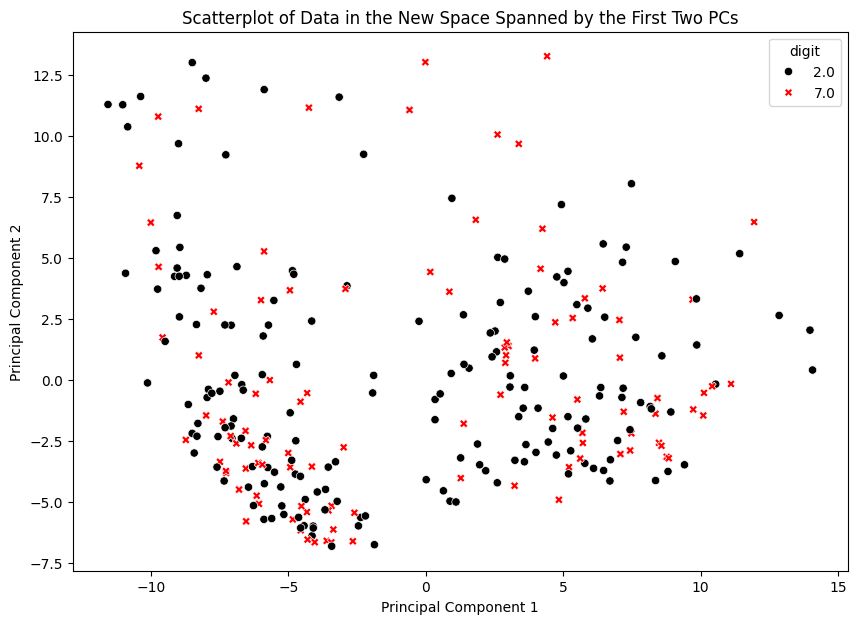

In [64]:
# Convert the PCA result to a DataFrame
Xtrain_std_pca_df = pd.DataFrame(data=Xtrain_std_pca, columns=['PC1', 'PC2'])
# Plot the scatterplot
plt.figure(figsize=(10, 7))

colormap = np.array(['r', 'b'])
hue_colors = {2:"black", 7:"red"}
sns.scatterplot(x='PC1', y='PC2', data=Xtrain_std_pca_df, hue=y_train, style=y_train, palette=hue_colors, markers=True)
plt.title('Scatterplot of Data in the New Space Spanned by the First Two PCs')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

####B.2.3.Based on the plot do you think that these two digits can be separated well using only two PCs? Explain.

##### Based on the plot, **I do not think** that these two digits can be separated well using only two PCs as there is no clear distinction between the points representing the digits 2 and 7 in the above scatter plot. The points from both groups are intermixed.

#### B.3.1 Fit a logistic regression, in the new space, to separate digits 2 and 7.

In [65]:
from sklearn.linear_model import LogisticRegression

lgrg_model = LogisticRegression()
lgrg_model.fit(Xtrain_std_pca, y_train)
y_pred_log = lgrg_model.predict(Xtest_std_pca)

print("logreg.intercept_ :", lgrg_model.intercept_)
print("logreg.coef_ :",lgrg_model.coef_)

LogisticRegression()

logreg.intercept_ : [-1.27589175]
logreg.coef_ : [[-1.13493962 -0.11287083]]


#### B.4.1. Evaluate the trainded model on binar_test using accuracy, and an appropriate F-measure.

In [66]:
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, ConfusionMatrixDisplay

# confusion matrix
conf_matrix_logreg = confusion_matrix(y_test, y_pred_log)
print("* conf_matrix_logreg: ")
print(conf_matrix_logreg)

# accuracy
print("\n* accuracy_score_logreg: ")
print(np.trace(conf_matrix_logreg)/np.sum(conf_matrix_logreg))

classification_report_logreg = classification_report(y_test, y_pred_log)
print("\n* classification_report_logreg: ")
print(classification_report_logreg)

* conf_matrix_logreg: 
[[193   5]
 [  7 140]]

* accuracy_score_logreg: 
0.9652173913043478

* classification_report_logreg: 
              precision    recall  f1-score   support

           2       0.96      0.97      0.97       198
           7       0.97      0.95      0.96       147

    accuracy                           0.97       345
   macro avg       0.97      0.96      0.96       345
weighted avg       0.97      0.97      0.97       345



#### B.5.1. Build and print a confusion matrix for your predictions.

* conf_matrix_logreg: 
[[193   5]
 [  7 140]]


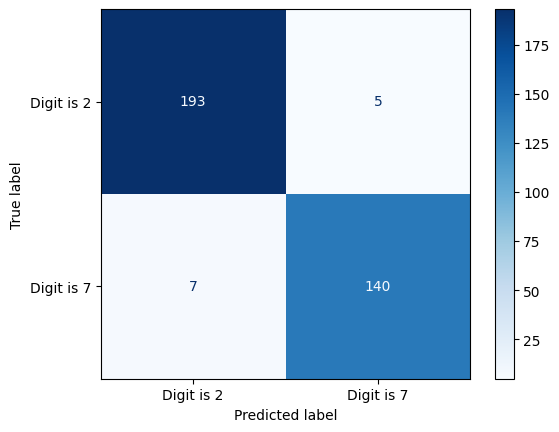

In [67]:
conf_matrix_logreg = confusion_matrix(y_test, y_pred_log)
print("* conf_matrix_logreg: ")
print(conf_matrix_logreg)

import seaborn as sns
import matplotlib.pyplot as plt
# Plot using sklearn's ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_logreg, display_labels=['Digit is 2', 'Digit is 7'])
disp.plot(cmap=plt.cm.Blues)
plt.show()

#### B.6.1. Project the whole data onto the first m=2,3,4,5 principal components (one m at a time) - (Using ziptrain <=> Whole Training Data).

In [71]:
X_all_data_train, y_all_data_train = ziptrain.iloc[:,1:], ziptrain.iloc[:,0]
X_all_data_test, y_all_data_test = ziptest.iloc[:,1:], ziptest.iloc[:,0]

X_all_data_train_pca = []
for m in range(2,6):
    pca_all_data = PCA(n_components=m)
    X_all_data_train_pca.append(pca_all_data.fit_transform(X_all_data_train))
    #X_test_std_pca = pca.transform(X_test_std)
    print ("For",m,"components: ","pca_all_data.explained_variance_ratio=",pca_all_data.explained_variance_ratio_.sum())

For 2 components:  pca_all_data.explained_variance_ratio= 0.2685146393018152
For 3 components:  pca_all_data.explained_variance_ratio= 0.33423190873734965
For 4 components:  pca_all_data.explained_variance_ratio= 0.3897773729629922
For 5 components:  pca_all_data.explained_variance_ratio= 0.4389192630733069


####B.7.1. For each m, and using 5-fold cross-validation, train a linear discriminant classifier on ziptrain. (Using ziptrain <=> Whole Training Data).

In [72]:
from sklearn.model_selection import cross_val_score, KFold
k=5 # five folds as requested
kf = KFold(n_splits=k, shuffle=True, random_state=47)

cv_results_m2TO5 = []
for m in range(2,6):
  print(m-1 , "- Case m=", m, ":")
  LnrDscAnl2_5 = LinearDiscriminantAnalysis()

# use cross_val_score and store cv results in cv_results_m2TO5 list for later use
  cv_results_m2TO5.append(cross_val_score(LnrDscAnl2_5, X_all_data_train_pca[m-2], y_all_data_train, cv=kf, scoring='accuracy'))
  print("accuracy list:", cv_results_m2TO5[m-2])
  print("accuracy mean:",cv_results_m2TO5[m-2].mean())
  print("-----------------------------------------------------------------------")

1 - Case m= 2 :
accuracy list: [0.55723098 0.52674897 0.55006859 0.5521262  0.52812071]
accuracy mean: 0.5428590904005318
-----------------------------------------------------------------------
2 - Case m= 3 :
accuracy list: [0.59355723 0.57133059 0.58984911 0.59465021 0.5733882 ]
accuracy mean: 0.5845550675952016
-----------------------------------------------------------------------
3 - Case m= 4 :
accuracy list: [0.69019877 0.68175583 0.70987654 0.6920439  0.69135802]
accuracy mean: 0.693046611966217
-----------------------------------------------------------------------
4 - Case m= 5 :
accuracy list: [0.72583962 0.72016461 0.72839506 0.71879287 0.71056241]
accuracy mean: 0.7207509136328978
-----------------------------------------------------------------------


####B.8.1. Based on cross-validated accuracy, select the best number of principal components m. (Using ziptrain <=> Whole Training Data).

##### Based on cross-validated accuracy, the best number of principal components m is when m=5 as it has highest value for the mean of the accuracy score